# Kerasのプラクティス
サイト：https://www.tensorflow.org/tutorials/keras/classification?hl=ja

In [1]:
# 環境確認
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11067666101919356672,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13250288972607476739
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5560362592
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6291531757194857416
 physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10621484510573181666
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
# TensorFlowとtf.kerasのインポート
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# ラベルごとの種類
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

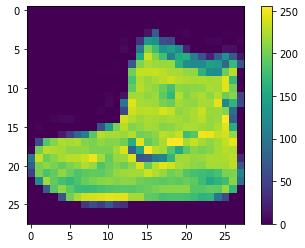

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [9]:
# ニューラルネットに投入する前に、値を0~1までの範囲にスケールさせるため、画素の値を255で割る(前処理)
train_images = train_images / 255.0
test_images = test_images / 255.0

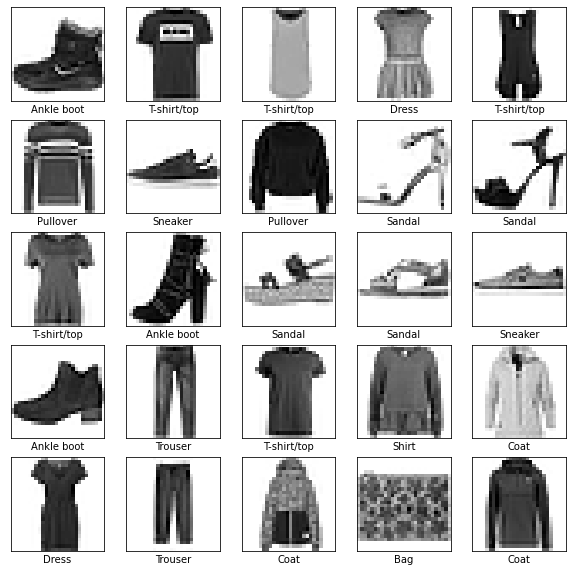

In [10]:
# 訓練用データセットの最初の25枚の画像を、クラス名付きで表示してみる
plt.figure(figsize=(10, 10))
for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# モデルの構築

ニューラルネットワークを構築するには、まずモデルの階層を定義し、その後モデルをコンパイルします。

# 層の設定

ニューラルネットワークを形作る基本的な構成要素は層（layer）です。層は、入力されたデータから「表現」を抽出します。それらの「表現」は、今取り組もうとしている問題に対して、より「意味のある」ものであることが期待されます。

ディープラーニングモデルのほとんどは、単純な層の積み重ねで構成されています。`tf.keras.layers.Dense` のような層のほとんどには、訓練中に学習されるパラメータが存在します。

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 各レイヤの説明

- Flatten

    画像を(28 * 28)ピクセルの2次元配列から、28×28=784ピクセルの1次元配列に変換する。

- Dense

    全結合する(重みをかけて足す→かけて足す→かけて足す→…)。128個のノードがある。

    最後の層では、Softmax層となり、合計が1になる10個の確率の配列を返す。それぞれのノードは、画像がそのクラスに属する確率を出力する。

# モデルのコンパイル

モデルが訓練できるようになるには、いくつかの設定を追加する必要があります。それらの設定は、モデルのコンパイル(compile）時に追加されます。

- 損失関数（loss function） 

    訓練中にモデルがどれくらい正確かを測定します。この関数の値を最小化することにより、訓練中のモデルを正しい方向に向かわせようというわけです。

- オプティマイザ（optimizer）

    モデルが見ているデータと、損失関数の値から、どのようにモデルを更新するかを決定します。

- メトリクス（metrics） 

    訓練とテストのステップを監視するのに使用します。下記の例ではaccuracy （正解率）、つまり、画像が正しく分類された比率を使用しています。

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの訓練

ニューラルネットワークの訓練には次のようなステップが必要です。

1. モデルに訓練用データを投入します—この例では train_images と train_labels の２つの配列です。

1. モデルは、画像とラベルの対応関係を学習します。

1. モデルにテスト用データセットの予測（分類）を行わせます—この例では test_images 配列です。その後、予測結果と test_labels 配列を照合します。

訓練を開始するには、model.fit メソッドを呼び出します。モデルを訓練用データに "fit"（適合）させるという意味です。

## verbose: 

0, 1または2．詳細表示モード．0とすると標準出力にログを出力しません． 1の場合はログをプログレスバーで標準出力，2の場合はエポックごとに1行のログを出力します．

In [14]:
model.fit(train_images, train_labels, epochs=5 verbose=2)

SyntaxError: invalid syntax (<ipython-input-14-3c1b30991975>, line 1)

# 正解率の評価

次に、テスト用データセットに対するモデルの性能を比較します。

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: {:.2f}'.format(test_acc))

313/313 - 0s - loss: 0.3618 - accuracy: 0.8735

Test accuracy: 0.87


ご覧の通り、テスト用データセットでの正解率は、訓練用データセットでの正解率よりも少し低くなります。この訓練時の正解率とテスト時の正解率の差は、過学習（over fitting）の一例です。過学習とは、新しいデータに対する機械学習モデルの性能が、訓練時と比較して低下する現象です。

# 予測する
モデルの訓練が終わったら、そのモデルを使って画像の分類予測を行うことが出来ます。

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([2.55303462e-07, 4.83496549e-08, 5.62019409e-07, 1.08184020e-06,
       1.36981942e-06, 2.26429151e-03, 2.10564122e-06, 1.23305336e-01,
       3.07480259e-05, 8.74394178e-01], dtype=float32)

予測結果は、10個の数字の配列です。これは、その画像が10の衣料品の種類のそれぞれに該当するかの「確信度」を表しています。どのラベルが一番確信度が高いかを見てみましょう。

In [20]:
np.argmax(predictions[0])

9

In [21]:
class_names[9]

'Ankle boot'

In [22]:
test_labels[0]
# 正解！

9

In [23]:
# 10チャンネルをすべてグラフ化してみる
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

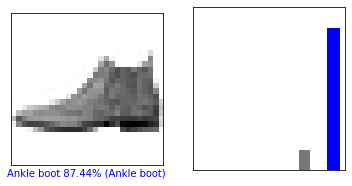

In [24]:
# 0番目の画像と予測、予測配列を見てみる (正解)
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

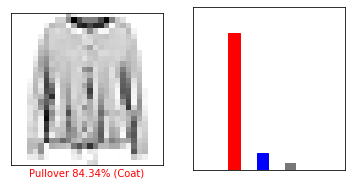

In [28]:
# 25番目を見てみる (はずれ)
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

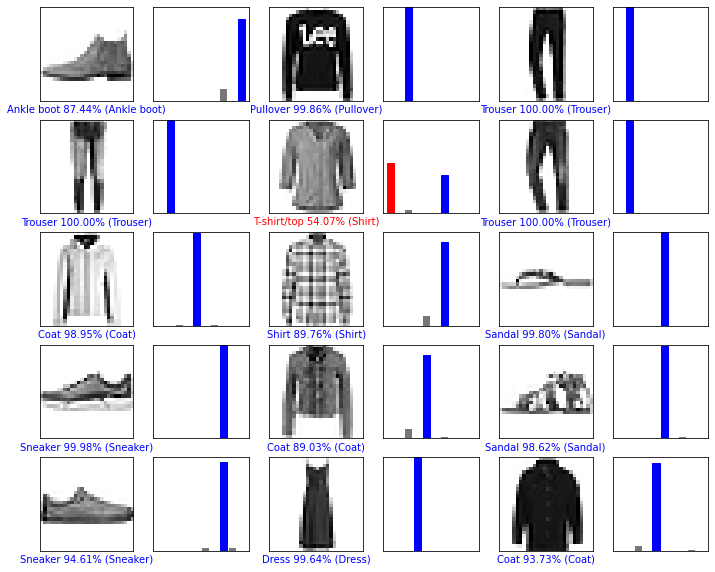

In [32]:
# 一覧で表示してみる
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [34]:
# 1枚の画像に対する予測を行ってみる
# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras モデルは、サンプルの中のバッチ（batch）あるいは「集まり」について予測を行うように作られています。そのため、1枚の画像を使う場合でも、リスト化する必要があります。

In [35]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.55303462e-07 4.83497438e-08 5.62019409e-07 1.08184020e-06
  1.36981942e-06 2.26429268e-03 2.10564508e-06 1.23305336e-01
  3.07480550e-05 8.74394178e-01]]


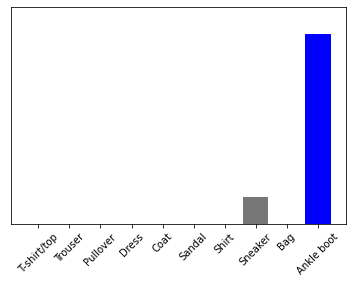

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

9